In [1]:
from google.colab import files
uploaded=files.upload()

Saving Wine_clust .csv to Wine_clust .csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path="/content/Wine_clust .csv"
df=pd.read_csv(path)
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluation metrics for K-means:
Silhouette score: 0.2848589191898987
Calinski-Harabasz index: 70.94000800315118
Davies-Bouldin index: 1.3891879777181648



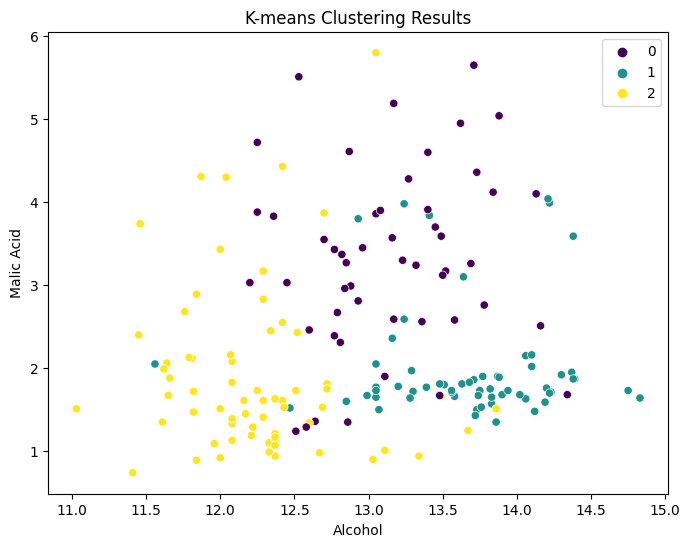

Evaluation metrics for Agglomerative:
Silhouette score: 0.2774439826952265
Calinski-Harabasz index: 67.6474675044098
Davies-Bouldin index: 1.4185919431857326



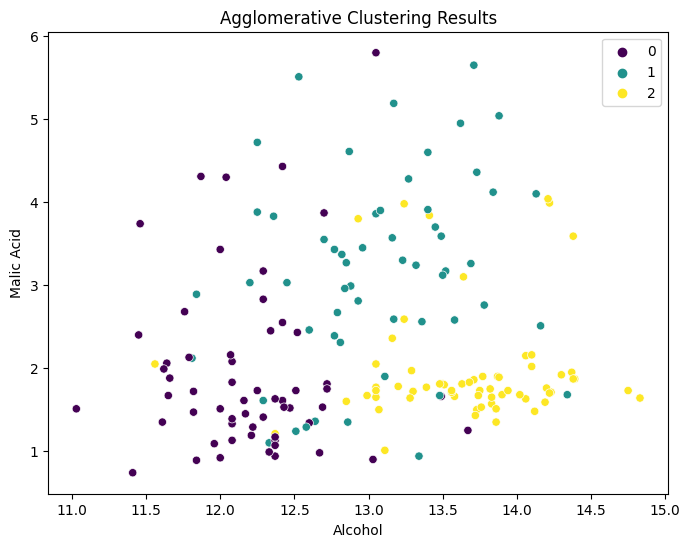

DBSCAN resulted in a single cluster. Skipping evaluation.

Evaluation metrics for GMM:
Silhouette score: 0.2844212860533542
Calinski-Harabasz index: 70.68777673224996
Davies-Bouldin index: 1.3938008647586724



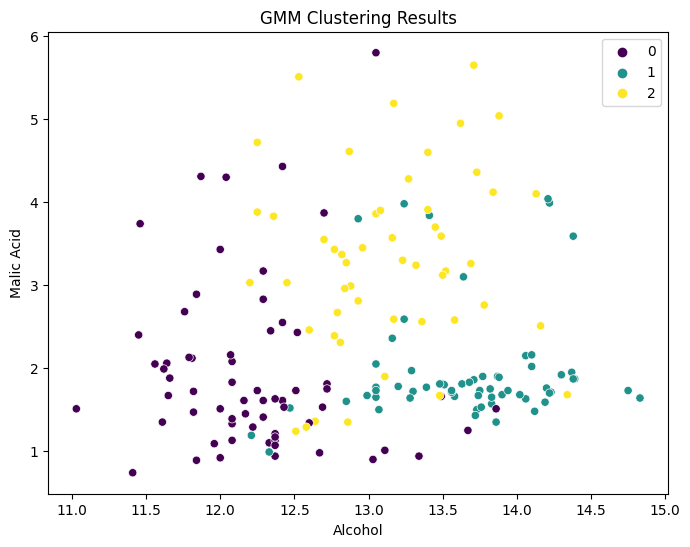

In [6]:
#Try out different clustering models in the given dataset. Find the optimum
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Data preprocessing - scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Define the clustering models
clustering_models = {
    'K-means': KMeans(n_clusters=3, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=3, random_state=42)
}

# Fit and evaluate the clustering models
for name, model in clustering_models.items():
    model.fit(X_scaled)

    # Obtain the cluster labels
    if name == 'GMM':
        labels = model.predict(X_scaled)
    else:
        labels = model.labels_

    # Skip models that result in a single cluster
    if len(set(labels)) == 1:
        print(f'{name} resulted in a single cluster. Skipping evaluation.\n')
        continue

    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)

    print(f'Evaluation metrics for {name}:')
    print(f'Silhouette score: {silhouette}')
    print(f'Calinski-Harabasz index: {calinski}')
    print(f'Davies-Bouldin index: {davies}\n')

    # Visualize the clustering results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Alcohol'], y=df['Malic_Acid'], hue=labels, palette='viridis')
    plt.title(f'{name} Clustering Results')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.show()

In [7]:
# Find optimum number of clusters in each model and create the model with optimum number of clusters
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Data preprocessing - scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Define the range of parameter values to try
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

# Define the clustering models
clustering_models = {
    'K-means': KMeans,
    'Agglomerative': AgglomerativeClustering,
    'DBSCAN': DBSCAN,
    'GMM': GaussianMixture
}

# Find the optimum parameters and create models with the optimum parameters
for name, model_class in clustering_models.items():
    best_score = -1
    best_params = {}
    best_model = None

    if name == 'DBSCAN':
        for eps in eps_values:
            for min_samples in min_samples_values:
                model = model_class(eps=eps, min_samples=min_samples)
                labels = model.fit_predict(X_scaled)

                # Skip if only one cluster is found
                if len(set(labels)) == 1:
                    continue

                silhouette = silhouette_score(X_scaled, labels)
                calinski = calinski_harabasz_score(X_scaled, labels)
                davies = davies_bouldin_score(X_scaled, labels)

                # Choose the optimum parameters based on the evaluation metric
                if silhouette > best_score:
                    best_score = silhouette
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_model = model

        print(f'Optimum parameters for {name}: {best_params}')
        print(f'Best silhouette score: {best_score}\n')

        if 'eps' in best_params:
            # Create a new model with the optimum parameters
            best_model = model_class(eps=best_params['eps'], min_samples=best_params['min_samples'])
            best_labels = best_model.fit_predict(X_scaled)

            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df['Alcohol'], y=df['Malic_Acid'], hue=best_labels, palette='viridis')
            plt.title(f'{name} Clustering Results with Optimum Parameters')
            plt.xlabel('Alcohol')
            plt.ylabel('Malic Acid')
            plt.show()

    elif name == 'GMM':
        # For GMM, find the optimum number of clusters
        for num_clusters in range(2, 10):
            model = model_class(n_components=num_clusters)
            model.fit(X_scaled)
            labels = model.predict(X_scaled)

            if len(set(labels)) == 1:
                continue

            silhouette = silhouette_score(X_scaled, labels)
            calinski = calinski_harabasz_score(X_scaled, labels)
            davies = davies_bouldin_score(X_scaled, labels)

            # Choose the optimum number of clusters based on the evaluation metric
            if silhouette > best_score:
                best_score = silhouette
                best_params = {'n_clusters': num_clusters}
                best_model = model

        print(f'Optimum parameters for {name}: {best_params}')
        print(f'Best silhouette score: {best_score}\n')


Optimum parameters for DBSCAN: {}
Best silhouette score: -1

Optimum parameters for GMM: {'n_clusters': 3}
Best silhouette score: 0.2844212860533542



Number of clusters: 0
Number of noise points: 178


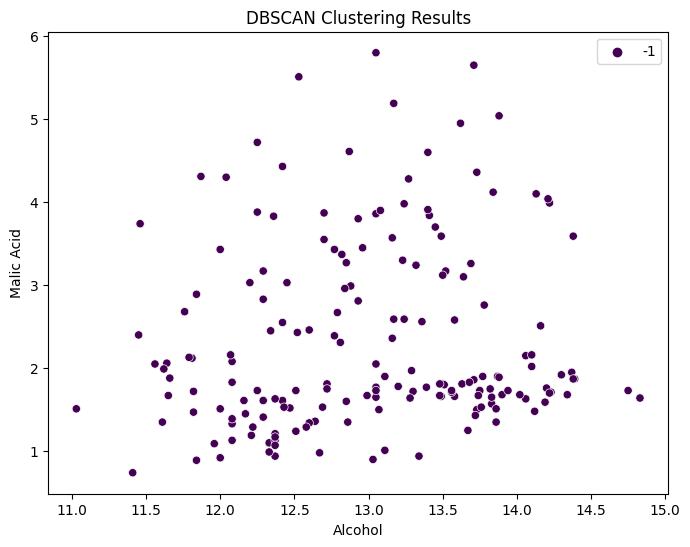

In [8]:
# Also learn about dB scan clustering and implement it
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing - scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and retrieve the labels
labels = dbscan.fit_predict(X_scaled)

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Alcohol'], y=df['Malic_Acid'], hue=labels, palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()